In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#data = pd.read_csv('/Users/michaeldoherty/git/XLRON/data/heuristic_comparison.csv')

heur_data = pd.read_csv('/Users/michaeldoherty/git/XLRON/data/JOCN2024/heuristic_comparison_high_traffic_new.csv')
k_data = pd.read_csv('/Users/michaeldoherty/git/XLRON/data/JOCN2024/k_traffic_comparison_new_new.csv')
# Data for each heuristic with k=50 at a range of traffic loads
traffic_data = pd.read_csv('/Users/michaeldoherty/git/XLRON/data/JOCN2024/experiment_results_traffic.csv')

# only include the columns service_blocking_probability_mean, service_blocking_probability_std, service_blocking_probability_iqr_lower, service_blocking_probability_iqr_upper
heur_data = heur_data[['TOPOLOGY', 'HEUR', 'K', 'LOAD', 'service_blocking_probability_mean', 'service_blocking_probability_std', 'service_blocking_probability_iqr_lower', 'service_blocking_probability_iqr_upper']]

# Filter out heuristics kmc_ff and kmf_ff
heur_data = heur_data[~heur_data['HEUR'].str.contains('kmc_ff|kmf_ff')]

# For topology with cost239 in the name, only keep rows with traffic = 317 (to match other blocking values)
heur_data = heur_data[~((heur_data['TOPOLOGY'].str.contains('cost239')) & (heur_data['LOAD'] != 317))]

# For topology with jon48 in the name, only keep rows with traffic = 115 (to match other blocking values)
heur_data = heur_data[~((heur_data['TOPOLOGY'].str.contains('jpn48')) & (heur_data['LOAD'] != 115))]

k_data

,HEUR,TOPOLOGY,LOAD,K,returns_mean,returns_std,returns_iqr_lower,returns_iqr_upper,lengths_mean,lengths_std,...,utilisation_iqr_lower,utilisation_iqr_upper,service_blocking_probability_mean,service_blocking_probability_std,service_blocking_probability_iqr_lower,service_blocking_probability_iqr_upper,bitrate_blocking_probability_mean,bitrate_blocking_probability_std,bitrate_blocking_probability_iqr_lower,bitrate_blocking_probability_iqr_upper
0,ksp_ff,nsfnet_deeprmsa_directed,90,2,0.99667,0.08158,1.0,1.0,10000.0,0.0,...,0.21455,0.25409,0.00141,0.00048,0.0011,0.0017,0.00183,0.00063,0.00139,0.00222
1,ksp_ff,nsfnet_deeprmsa_directed,90,5,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21500,0.25500,0.00008,0.00010,0.0000,0.0001,0.00011,0.00014,0.00000,0.00015
2,ksp_ff,nsfnet_deeprmsa_directed,90,8,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21455,0.25455,0.00002,0.00005,0.0000,0.0000,0.00003,0.00007,0.00000,0.00000
3,ksp_ff,nsfnet_deeprmsa_directed,90,11,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21449,0.25455,0.00001,0.00004,0.0000,0.0000,0.00002,0.00006,0.00000,0.00000
4,ksp_ff,nsfnet_deeprmsa_directed,90,14,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21449,0.25455,0.00001,0.00004,0.0000,0.0000,0.00001,0.00005,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,ksp_ff,jpn48_directed,100,17,0.98000,0.19900,1.0,1.0,10000.0,0.0,...,0.12726,0.15226,0.01049,0.00146,0.0095,0.0114,0.01296,0.00181,0.01171,0.01415
286,ksp_ff,jpn48_directed,100,20,0.98333,0.18181,1.0,1.0,10000.0,0.0,...,0.12793,0.15294,0.00893,0.00137,0.0080,0.0098,0.01111,0.00171,0.00993,0.01218
287,ksp_ff,jpn48_directed,100,25,0.98467,0.17445,1.0,1.0,10000.0,0.0,...,0.12805,0.15341,0.00753,0.00123,0.0067,0.0083,0.00942,0.00155,0.00833,0.01039
288,ksp_ff,jpn48_directed,100,30,0.98600,0.16675,1.0,1.0,10000.0,0.0,...,0.12823,0.15396,0.00656,0.00114,0.0058,0.0073,0.00825,0.00144,0.00726,0.00915


In [3]:
# For each topology, create a figure and plot the mean, lower iqr and upper iqr for the different heuristics across k values. So k is on x-xis and y isservice blocking probability.

In [4]:
topologies = heur_data['TOPOLOGY'].unique()
topologies = np.array(['nsfnet_deeprmsa_directed', 'cost239_deeprmsa_directed', 'usnet_gcnrnn_directed', 'jpn48_directed'])
topologies

array(['nsfnet_deeprmsa_directed', 'cost239_deeprmsa_directed',
       'usnet_gcnrnn_directed', 'jpn48_directed'], dtype='<U25')

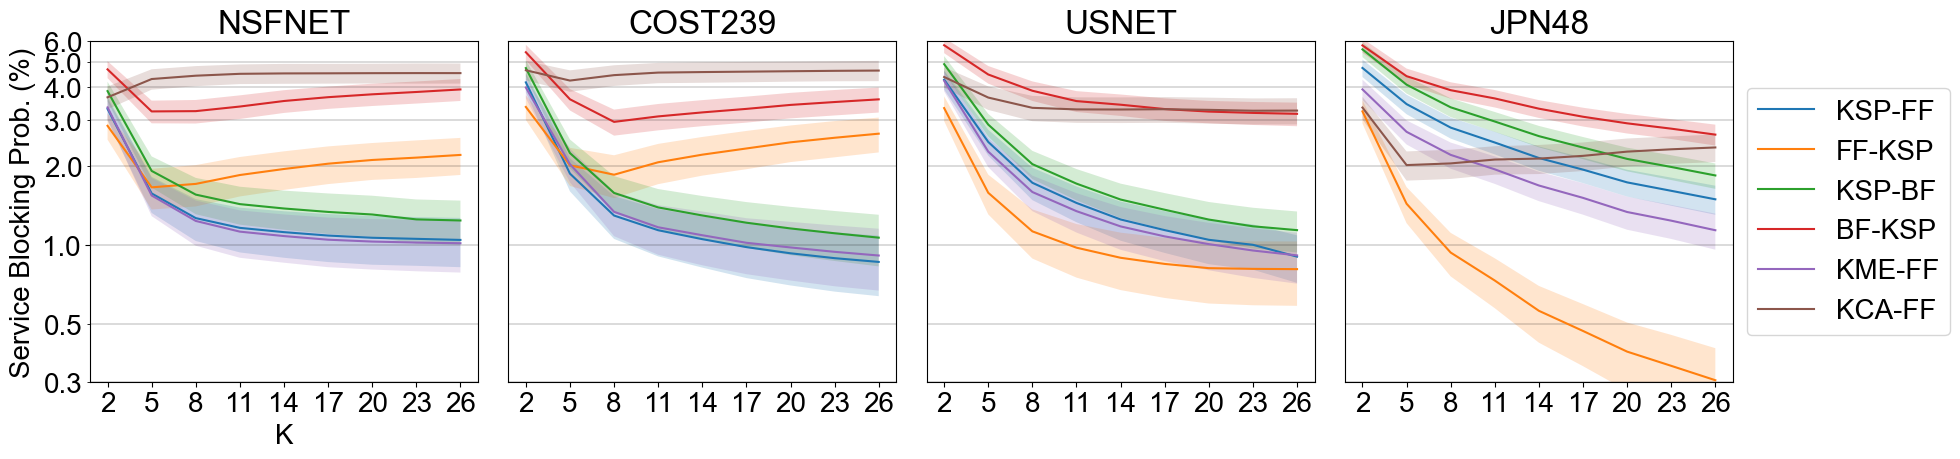

In [10]:
# arrange subplots horizontally
fig, axs = plt.subplots(1, len(topologies), figsize=(20, 5))
# Set fontsize to 20
mpl.rcParams.update({'font.size': 20})
mpl.rcParams.update({'font.family': 'Arial'})
axes = []
for n, topology in enumerate(topologies):
    ax = axs[topologies.tolist().index(topology)]
    ax.set_title(topology.split('_')[0].upper())
    # log scale
    ax.set_yscale('log')
    if n == 0:
        ax.set_ylim(0.3, 6)
        ax.set_xlabel('K')
        ax.set_ylabel('Service Blocking Prob. (%)')
        ax.set_yticks([0.3, 0.5, 1, 2, 3, 4, 5, 6], minor=True)
        # Set y-axis tick format to scalar (not scientific) and don't use decimal places
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
        ax.yaxis.set_minor_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
        ax.set_xticks(heur_data['K'].unique())
        
    else:
        ax.sharey(axes[0])
        ax.sharex(axes[0])
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        
    # Show gridlines for minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.2, axis='y')
    ax.grid(which='major', color='black', linestyle='-', linewidth=0.2, axis='y')
    
    for heuristic in heur_data['HEUR'].unique():
        df = heur_data[(heur_data['TOPOLOGY'] == topology) & (heur_data['HEUR'] == heuristic)]
        ax.plot(df['K'], df['service_blocking_probability_mean']*100, label=heuristic.upper().replace('_', '-'))
        upper = df['service_blocking_probability_mean'] + df['service_blocking_probability_std']
        lower = df['service_blocking_probability_mean'] - df['service_blocking_probability_std']
        # upper = df['service_blocking_probability_iqr_upper']
        # lower = df['service_blocking_probability_iqr_lower']
        ax.fill_between(df['K'], lower*100, upper*100, alpha=0.2)
    axes.append(ax)

# set legend outside of plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('heuristic_comparison.png')
plt.show()

In [6]:
k_data
# where IQR lower service blocking prob doesn't exist, fill it with previous value
k_data['service_blocking_probability_iqr_lower'] = k_data['service_blocking_probability_iqr_lower'].ffill()
# where upper is zero, fill it with the mean value
k_data['service_blocking_probability_iqr_upper'] = np.where(k_data['service_blocking_probability_iqr_upper'] == 0, k_data['service_blocking_probability_mean'], k_data['service_blocking_probability_iqr_upper'])
topologies = k_data['TOPOLOGY'].unique()
k_data

,HEUR,TOPOLOGY,LOAD,K,returns_mean,returns_std,returns_iqr_lower,returns_iqr_upper,lengths_mean,lengths_std,...,utilisation_iqr_lower,utilisation_iqr_upper,service_blocking_probability_mean,service_blocking_probability_std,service_blocking_probability_iqr_lower,service_blocking_probability_iqr_upper,bitrate_blocking_probability_mean,bitrate_blocking_probability_std,bitrate_blocking_probability_iqr_lower,bitrate_blocking_probability_iqr_upper
0,ksp_ff,nsfnet_deeprmsa_directed,90,2,0.99667,0.08158,1.0,1.0,10000.0,0.0,...,0.21455,0.25409,0.00141,0.00048,0.0011,0.00170,0.00183,0.00063,0.00139,0.00222
1,ksp_ff,nsfnet_deeprmsa_directed,90,5,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21500,0.25500,0.00008,0.00010,0.0000,0.00010,0.00011,0.00014,0.00000,0.00015
2,ksp_ff,nsfnet_deeprmsa_directed,90,8,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21455,0.25455,0.00002,0.00005,0.0000,0.00002,0.00003,0.00007,0.00000,0.00000
3,ksp_ff,nsfnet_deeprmsa_directed,90,11,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21449,0.25455,0.00001,0.00004,0.0000,0.00001,0.00002,0.00006,0.00000,0.00000
4,ksp_ff,nsfnet_deeprmsa_directed,90,14,1.00000,0.00000,1.0,1.0,10000.0,0.0,...,0.21449,0.25455,0.00001,0.00004,0.0000,0.00001,0.00001,0.00005,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,ksp_ff,jpn48_directed,100,17,0.98000,0.19900,1.0,1.0,10000.0,0.0,...,0.12726,0.15226,0.01049,0.00146,0.0095,0.01140,0.01296,0.00181,0.01171,0.01415
286,ksp_ff,jpn48_directed,100,20,0.98333,0.18181,1.0,1.0,10000.0,0.0,...,0.12793,0.15294,0.00893,0.00137,0.0080,0.00980,0.01111,0.00171,0.00993,0.01218
287,ksp_ff,jpn48_directed,100,25,0.98467,0.17445,1.0,1.0,10000.0,0.0,...,0.12805,0.15341,0.00753,0.00123,0.0067,0.00830,0.00942,0.00155,0.00833,0.01039
288,ksp_ff,jpn48_directed,100,30,0.98600,0.16675,1.0,1.0,10000.0,0.0,...,0.12823,0.15396,0.00656,0.00114,0.0058,0.00730,0.00825,0.00144,0.00726,0.00915


[ 90 103 119 137 157 181]
[190 218 251 289 332 382]
[140 160 184 211 243 279]
[ 60  69  79  91 105 120  52  61  72  93 100]


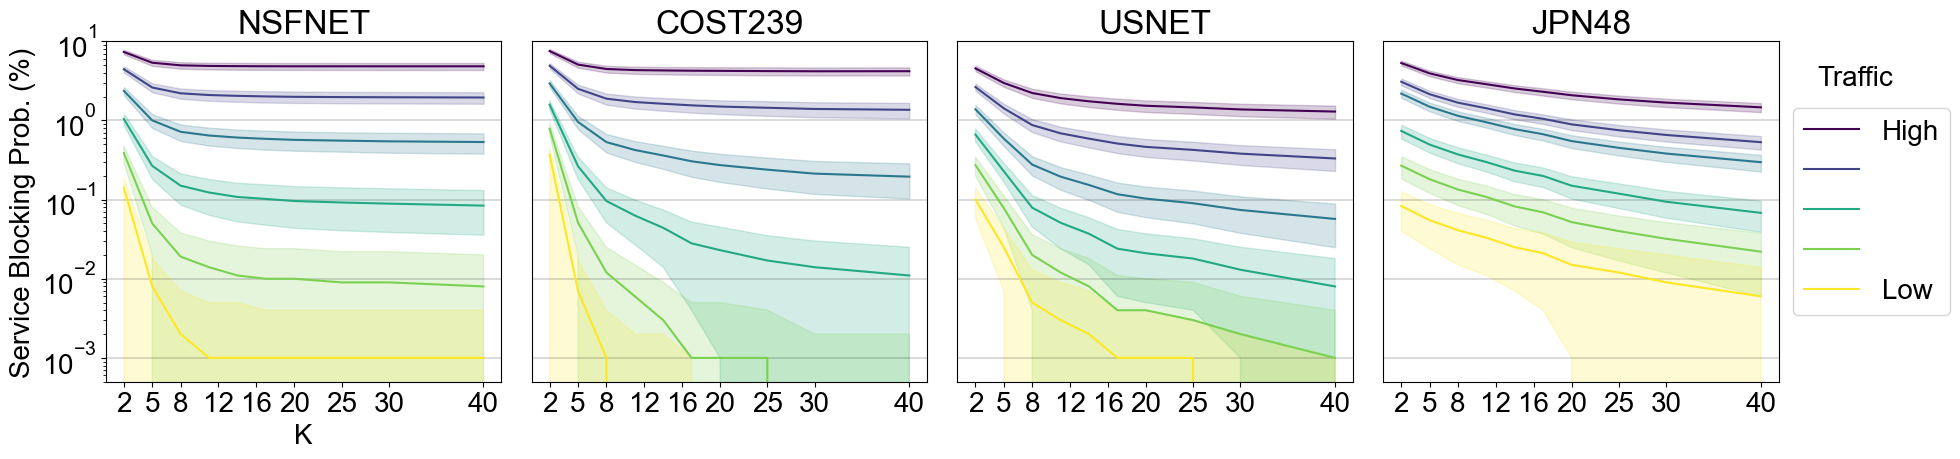

In [7]:
# For each topology, do a separate plot. In each plot, do k on x-axis and service blocking probability on y. Have a separate line for each traffic load.
# arrange subplots horizontally
fig, axs = plt.subplots(1, len(topologies), figsize=(20, 5))
# Set fontsize to 20
mpl.rcParams.update({'font.size': 20})
# set font to arial
mpl.rcParams.update({'font.family': 'Arial'})
axes = []
for n, topology in enumerate(topologies):
    ax = axs[topologies.tolist().index(topology)]
    ax.set_title(topology.split('_')[0].upper())
    # log scale
    ax.set_yscale('log')
    if n == 0:
        ax.set_ylim(0.0005,10)
        ax.set_ylabel('Service Blocking Prob. (%)')
        ax.set_xlabel('K')
        #ax.set_yticks([0.6, 1, 2, 3, 4, 5, 6], minor=True)
        # Set y-axis tick format to scalar (not scientific) and don't use decimal places
        #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
        #ax.set_xticks([2, 5, 8, 14, 20, 25, 30, 40])
        ax.set_xticks([2, 5, 8, 12, 16, 20, 25, 30, 40])
    else:
        ax.sharey(axes[0])
        ax.sharex(axes[0])
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        
    # Show gridlines for minor ticks
    ax.grid(which='major', color='black', linestyle='-', linewidth=0.2, axis='y')
    
    labels = ["High", " ", "", " ", " ", "Low"]
    loads = k_data[k_data['TOPOLOGY'] == topology]['LOAD'].unique()
    print(loads)
    if topology == 'jpn48_directed':
        loads = np.array([52, 61, 72, 91, 100, 120]) 

    # Set colors as color map from high to low
    colors = plt.cm.viridis(np.linspace(0, 1, len(loads)))
    for i, traffic in enumerate(loads[::-1]):
        df = k_data[(k_data['TOPOLOGY'] == topology) & (k_data['LOAD'] == traffic)]
        ax.plot(df['K'], df['service_blocking_probability_mean']*100, color=colors[i], label=labels[i])
        upper = df['service_blocking_probability_mean'] + df['service_blocking_probability_std']
        lower = df['service_blocking_probability_mean'] - df['service_blocking_probability_std']
        # upper = df['service_blocking_probability_iqr_upper']
        # lower = df['service_blocking_probability_iqr_lower']
        ax.fill_between(df['K'], lower*100, upper*100, alpha=0.2, color=colors[i])
    axes.append(ax)
# set legend outside of plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Text box saying traffic level above the legend
plt.text(46, 2.8, s='Traffic')
plt.tight_layout()
plt.savefig('k_traffic_comparison.png')
plt.show()

In [8]:
# where IQR lower service blocking prob doesn't exist, fill it with previous value
traffic_data['service_blocking_probability_iqr_lower'] = traffic_data['service_blocking_probability_iqr_lower'].ffill()
# where upper is zero, fill it with the mean value
traffic_data['service_blocking_probability_iqr_upper'] = np.where(traffic_data['service_blocking_probability_iqr_upper'] == 0, traffic_data['service_blocking_probability_mean'], traffic_data['service_blocking_probability_iqr_upper'])

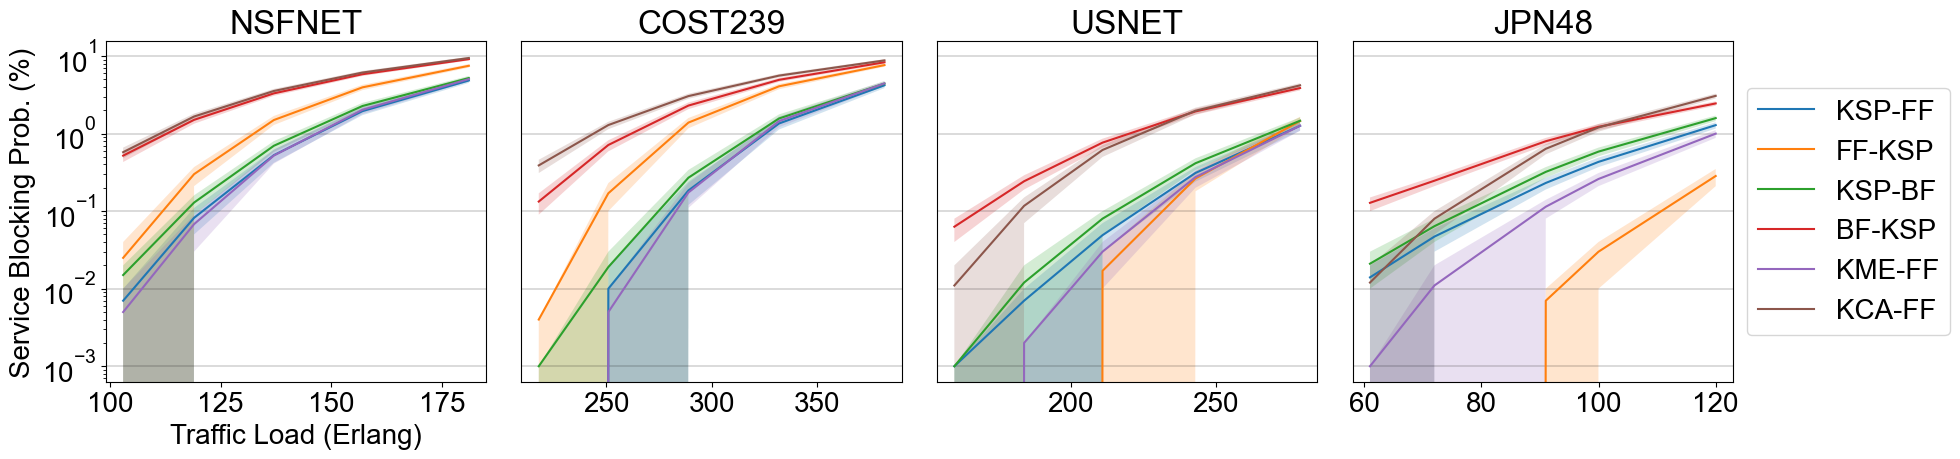

In [9]:
# For each topology, do a separate plot. In each plot, do k on x-axis and service blocking probability on y. Have a separate line for each traffic load.
# arrange subplots horizontally
fig, axs = plt.subplots(1, len(topologies), figsize=(20, 5))
# Set fontsize to 20
mpl.rcParams.update({'font.size': 20})
# set font to arial
mpl.rcParams.update({'font.family': 'Arial'})
axes = []
for n, topology in enumerate(topologies):
    ax = axs[topologies.tolist().index(topology)]
    ax.set_title(topology.split('_')[0].upper())
    # log scale
    ax.set_yscale('log')
    if n == 0:
        #ax.set_ylim(0.0005,10)
        ax.set_ylabel('Service Blocking Prob. (%)')
        ax.set_xlabel('Traffic Load (Erlang)')
        #ax.set_yticks([0.6, 1, 2, 3, 4, 5, 6], minor=True)
        # Set y-axis tick format to scalar (not scientific) and don't use decimal places
        #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
        #ax.set_xticks([2, 5, 8, 14, 20, 25, 30, 40])
        #ax.set_xticks([2, 5, 8, 12, 16, 20, 25, 30, 40])
    else:
        ax.sharey(axes[0])
        #ax.sharex(axes[0])
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        
    # Show gridlines for minor ticks
    ax.grid(which='major', color='black', linestyle='-', linewidth=0.2, axis='y')
    
    for heuristic in traffic_data['HEUR'].unique():
        df = traffic_data[(traffic_data['TOPOLOGY'] == topology) & (traffic_data['HEUR'] == heuristic)]
        ax.plot(df['LOAD'], df['service_blocking_probability_mean']*100, label=heuristic.upper().replace('_', '-'))
        # upper = df['service_blocking_probability_mean'] + df['service_blocking_probability_std']
        # lower = df['service_blocking_probability_mean'] - df['service_blocking_probability_std']
        upper = df['service_blocking_probability_iqr_upper']
        lower = df['service_blocking_probability_iqr_lower']
        ax.fill_between(df['LOAD'], lower*100, upper*100, alpha=0.2)
    axes.append(ax)
    
# set legend outside of plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('heuristic_50_traffic_comparison.png')
plt.show()